# Linear Regression Practice

CalCOFI: Over 60 years of oceanographic data

### Context:

The CalCOFI data set represents the longest (1949-present) and most complete (more than 50,000 sampling stations) time series of oceanographic and larval fish data in the world. It includes abundance data on the larvae of over 250 species of fish; larval length frequency data and egg abundance data on key commercial species; and oceanographic and plankton data. The physical, chemical, and biological data collected at regular time and space intervals quickly became valuable for documenting climatic cycles in the California Current and a range of biological responses to them. CalCOFI research drew world attention to the biological response to the dramatic Pacific-warming event in 1957-58 and introduced the term “El Niño” into the scientific literature.

The California Cooperative Oceanic Fisheries Investigations (CalCOFI) are a unique partnership of the California Department of Fish & Wildlife, NOAA Fisheries Service and Scripps Institution of Oceanography. The organization was formed in 1949 to study the ecological aspects of the sardine population collapse off California. Today our focus has shifted to the study of the marine environment off the coast of California, the management of its living resources, and monitoring the indicators of El Nino and climate change. CalCOFI conducts quarterly cruises off southern & central California, collecting a suite of hydrographic and biological data on station and underway. Data collected at depths down to 500 m include: temperature, salinity, oxygen, phosphate, silicate, nitrate and nitrite, chlorophyll, transmissometer, PAR, C14 primary productivity, phytoplankton biodiversity, zooplankton biomass, and zooplankton biodiversity.

https://www.kaggle.com/sohier/calcofi#cast.csv


# Questions:

## * Is there a relationship between water salinity & water temperature?

## * Can you predict the water temperature based on salinity?

In [2]:
import pandas as pd
import numpy as np
import explore

In [2]:
df = pd.read_csv("bottle.csv")
df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Wrangle

For the first phase, I am only interested in looking at temperature and salinity, with depth as a potential alternative variable. 

In [3]:
df = df[["Depthm", "T_degC", "Salnty"]]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 3 columns):
Depthm    864863 non-null int64
T_degC    853900 non-null float64
Salnty    817509 non-null float64
dtypes: float64(2), int64(1)
memory usage: 19.8 MB


In [5]:
# There are some null values, so I will try to remove them or change the values

pd.isnull(df.Salnty).value_counts()

False    817509
True      47354
Name: Salnty, dtype: int64

In [6]:
# There is a significant number of null values, but because of 
# this being a practice, and the data still being significantly large,
# I will drop all null values

df = df.dropna()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 3 columns):
Depthm    814247 non-null int64
T_degC    814247 non-null float64
Salnty    814247 non-null float64
dtypes: float64(2), int64(1)
memory usage: 24.8 MB


# Split and Scale

The data is now in a format that is usable for me, so I will start splitting the data

In [7]:
import split_scale

In [8]:
df = df[["T_degC", "Salnty"]]
df.columns = ["y", "x"]
df

,y,x
0,10.500,33.4400
1,10.460,33.4400
2,10.460,33.4370
3,10.450,33.4200
4,10.450,33.4210
...,...,...
864858,18.744,33.4083
864859,18.744,33.4083
864860,18.692,33.4150
864861,18.161,33.4062


In [9]:
x_train, x_test, y_train, y_test = split_scale.split_my_data(df.x, df.x, .8)

Because we are only looking at a single x variable, we don't need to scale the data.

# Explore

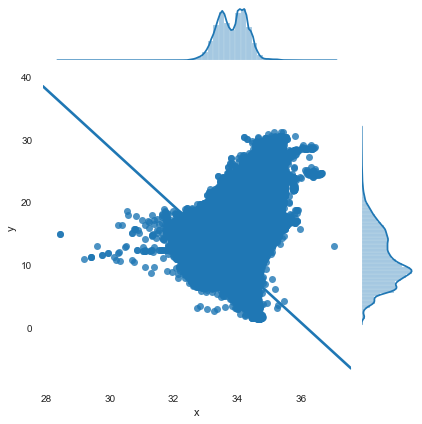

In [10]:
explore.create_jointplot(df, df.y, df.x)

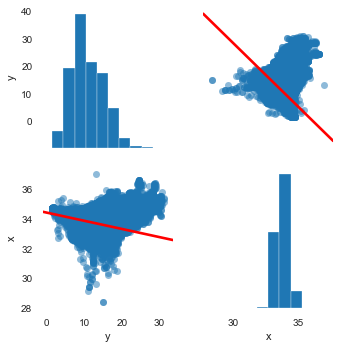

In [11]:
explore.plot_variable_pairs(df)

It seems, from general observations, that there is a negative correlation between temperature and salinity. Meaning that as salinity increases, temperature decreases. 

# Evaluate

I will use a simple OLS model, and compare it against the baseline

In [12]:
import evaluate
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
predictions = model.predict(df.x)

In [13]:
df = evaluate.calculate_y_hat(df, model)
df["yhat_baseline"] = df["y"].mean()
df["residuals"] = df["yhat"] - df["y"]
df.head()

,y,x,yhat,yhat_baseline,residuals
0,10.50,33.440,12.716165,10.860287,2.216165
1,10.46,33.440,12.716165,10.860287,2.256165
2,10.46,33.437,12.730037,10.860287,2.270037
3,10.45,33.420,12.808649,10.860287,2.358649
4,10.45,33.421,12.804025,10.860287,2.354025


In [14]:
evaluate.mean_errors_delta(df)

,metric,model_values,delta
0,SSE,1.082380e+07,-3.710520e+06
1,ESS,3.710520e+06,-1.082380e+07
2,TSS,1.453432e+07,-1.453432e+07
3,MSE,1.329302e+01,-4.556995e+00
4,RMSE,3.645959e+00,-5.789685e-01


In [15]:
evaluate.better_than_baseline(df)

True

In [16]:
evaluate.model_significance(model)

(0.2552936965915036, 0.0)

### Conclusion, at this time, I can conclude that salinity can be used as a good indicator of temperature, as there is a correlation. The model did perform better than the mean baseline, given that the RMSE was slighly smaller, and our p-value (0) is smaller than our $\alpha$ (0.05), so we can say it is significantly better. However, there is not a very strong $R^2$ value (below 0.4) and so there might be other features are that better suited for predicting temperature.

## Next Question - Is depth a better predictor of temperature?

In [17]:
df_2 = pd.read_csv("bottle.csv")
df_2.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df_2 = df_2[["Depthm", "T_degC", "Salnty"]]
pd.isnull(df_2.Salnty).value_counts()
df_2 = df_2.dropna()

df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814247 entries, 0 to 864862
Data columns (total 3 columns):
Depthm    814247 non-null int64
T_degC    814247 non-null float64
Salnty    814247 non-null float64
dtypes: float64(2), int64(1)
memory usage: 24.8 MB


In [19]:
df_2 = df_2[["Depthm", "T_degC"]]

df_2.columns = ["x", "y"]

df_2

,x,y
0,0,10.500
1,8,10.460
2,10,10.460
3,19,10.450
4,20,10.450
...,...,...
864858,0,18.744
864859,2,18.744
864860,5,18.692
864861,10,18.161


## Split and Scale

In [20]:
x_train, x_test, y_train, y_test = split_scale.split_my_data(df_2.y, df_2.x, .8)

In [21]:
x_train

679651     8.150
781656     8.200
856349     7.549
191566     5.800
566052     5.760
           ...  
229501    13.730
18128      8.390
29051      5.410
316349     7.800
824244     5.770
Name: y, Length: 651397, dtype: float64

# Explore

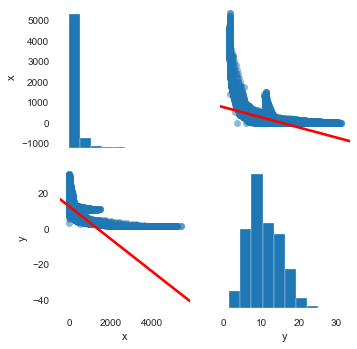

In [22]:
explore.plot_variable_pairs(df_2)

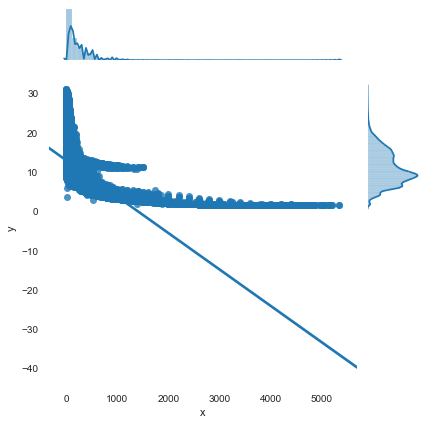

In [23]:
explore.create_jointplot(df_2, df_2.y, df_2.x)

# Split and Scale

In [24]:
train, test, _, _ = split_scale.split_my_data(df_2.x, df_2.y, .8)

In [25]:
train

679651    200
781656    269
856349    300
191566    478
566052    519
         ... 
229501     30
18128      75
29051     500
316349    224
824244    441
Name: x, Length: 651397, dtype: int64

# Evaluate

In [33]:
model_2 = ols('y ~ x', data=df_2).fit()
predictions = model.predict(df_2.x)

In [34]:
df_2 = evaluate.calculate_y_hat(df_2, model_2)

In [35]:
df_2["baseline"] = df["yhat"]

In [36]:
df_2

,x,y,yhat,baseline,yhat_baseline
0,0,10.500,12.915431,12.716165,10.860287
1,8,10.460,12.841351,12.716165,10.860287
2,10,10.460,12.822831,12.730037,10.860287
3,19,10.450,12.739490,12.808649,10.860287
4,20,10.450,12.730230,12.804025,10.860287
...,...,...,...,...,...
864858,0,18.744,12.915431,12.862753,10.860287
864859,2,18.744,12.896911,12.862753,10.860287
864860,5,18.692,12.869131,12.831771,10.860287
864861,10,18.161,12.822831,12.872464,10.860287


In [37]:
evaluate.mean_errors_delta(df_2)

,metric,model_values,delta
0,SSE,7.882583e+06,-6.651735e+06
1,ESS,6.651735e+06,-7.882583e+06
2,TSS,1.453432e+07,-1.453432e+07
3,MSE,9.680826e+00,-8.169186e+00
4,RMSE,3.111403e+00,-1.113525e+00


In [38]:
evaluate.better_than_baseline(df_2)

True

In [39]:
evaluate.model_significance(model_2)

(0.4576571804321671, 0.0)

## Next Question - should we look at multivariate analysis to understand if there is better correlation? 

### * Are depth and salinity good predictors of temperature?

In [40]:
# X = df_adv[['TV', 'Radio']] y = df_adv['Sales']
# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()
# est.summary()

In [41]:
df_multi = pd.read_csv("Bottle.csv")
df_multi.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
df_multi = df_multi[["Depthm", "T_degC", "Salnty"]]

df_multi = df_multi.dropna()

In [100]:
df_multi_X = df_multi[["Depthm", "Salnty"]]
df_multi_y = df_multi[["T_degC"]]

In [101]:
test, train, test_y, train_y = split_scale.split_my_data(df_multi_X, df_multi_y, .8)

In [102]:
print(train.shape)
print(train_y.shape)

(162850, 2)
(162850, 1)


In [122]:
train

,Depthm,Salnty
408676,50,33.210
15662,98,33.660
81026,10,33.490
29505,125,33.884
822367,2,33.464
...,...,...
702772,0,33.710
680851,900,34.437
753018,400,34.126
687315,55,32.897


In [123]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(train, test)

In [124]:
train_scaled

,Depthm,Salnty
408676,-0.555739,-1.366295
15662,-0.399850,-0.390679
81026,-0.685647,-0.759245
29505,-0.312162,0.094962
822367,-0.711629,-0.815614
...,...,...
702772,-0.718124,-0.282277
680851,2.204808,1.293886
753018,0.580957,0.619627
687315,-0.539501,-2.044891


In [125]:
train_y

,T_degC
408676,10.78
15662,14.70
81026,16.62
29505,8.96
822367,14.10
...,...
702772,12.40
680851,4.61
753018,6.61
687315,13.57


In [126]:
import statsmodels.api as sm

X = sm.add_constant(train_scaled)
est = sm.OLS(train_y, X).fit()
evaluate.model_significance(est)

(0.4775024633081949, 0.0)

Is this having an effect because y is not scaled?

In [134]:
X["yhat"] = est.predict(X)

In [137]:
X["yhat_baseline"] = df_2["yhat"]

In [140]:
X["y"] = train_y

Is it a problem that "yhat_baseline" is based on a different scale? 

In [141]:
evaluate.mean_errors_delta(X)

,metric,model_values,delta
0,SSE,1.520479e+06,-1.389542e+06
1,ESS,1.389542e+06,-1.520479e+06
2,TSS,2.910021e+06,-2.910021e+06
3,MSE,9.336681e+00,-8.532650e+00
4,RMSE,3.055598e+00,-1.171615e+00


Again, can the RMSE still be used given that the scale of the baselines is different

In [142]:
evaluate.better_than_baseline(X)

True

Conclusion, given that the RMSE for our multivariable model is smaller than our previous model, we can conclude that our new model is mode accurate

In [150]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted

    fig, axs = plt.subplots(2, 2, figsize=(12, 12))
    axs[0, 0].hist(residuals, bins=20, ec='black', fc='white')
    axs[0, 0].set(title="Distribution of Residuals")

    axs[0, 1].scatter(actual, predicted, marker='.', c='firebrick')
    axs[0, 1].plot([actual.min(), actual.max()], [actual.min(), actual.max()], ls=':', color='black')
    axs[0, 1].set(title="Actual vs Predicted", xlabel="$y$", ylabel=r"$\hat{y}$")

    axs[1, 0].scatter(actual, residuals, marker='.', c='firebrick')
    axs[1, 0].hlines(0, actual.min(), actual.max(), ls=':', color='black')
    axs[1, 0].set(title="Actual vs Residuals", xlabel="$y$", ylabel=r"$y - \hat{y}$")

    axs[1, 1].scatter(predicted, residuals, marker='.', c='firebrick')
    axs[1, 1].hlines(0, actual.min(), actual.max(), ls=':', color='black')
    axs[1, 1].set(
        title="Predicted vs Residuals", xlabel=r"$\hat{y}$", ylabel=r"$y - \hat{y}$"
    )

    return fig, axs

(<Figure size 864x864 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12e161c10>,
       dtype=object))

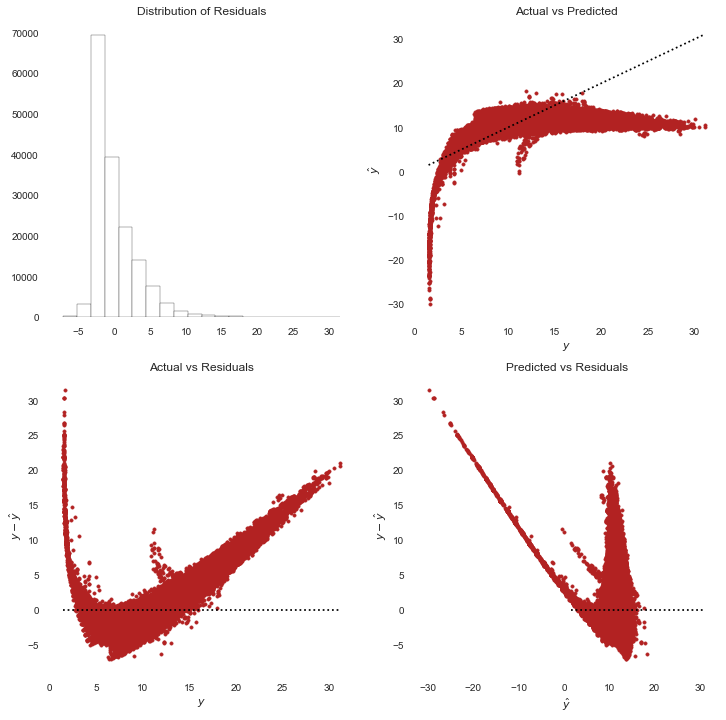

In [152]:
ddimport matplotlib.pyplot as plt
plot_residuals(X["y"], X["yhat"])

# Feature Engineering

In [29]:
df_4 = pd.read_csv("bottle.csv")
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
Cst_Cnt                864863 non-null int64
Btl_Cnt                864863 non-null int64
Sta_ID                 864863 non-null object
Depth_ID               864863 non-null object
Depthm                 864863 non-null int64
T_degC                 853900 non-null float64
Salnty                 817509 non-null float64
O2ml_L                 696201 non-null float64
STheta                 812174 non-null float64
O2Sat                  661274 non-null float64
Oxy_µmol/Kg            661268 non-null float64
BtlNum                 118667 non-null float64
RecInd                 864863 non-null int64
T_prec                 853900 non-null float64
T_qual                 23127 non-null float64
S_prec                 817509 non-null float64
S_qual                 74914 non-null float64
P_qual                 673755 non-null float64
O_qual                 184676 non-null float64
SThtaq  

In [30]:
import feature_engineering
import split_scale
from sklearn.model_selection import train_test_split

In [31]:
df_4 = df_4.select_dtypes(exclude=['object'])

In [53]:
df_4 = df_4.dropna(axis = 1, thresh=800_000)

In [57]:
df_4 = df_4.dropna()

In [58]:
def split_my_df(df):
    train, test = train_test_split(df, train_size=.8, random_state=123)
    return train, test

In [59]:
train, test = split_my_df(df_4)

In [60]:
X_train = df_4.drop(columns="T_degC")
y_train = df_4[["T_degC"]]
X_test = df_4.drop(columns = "T_degC")
y_test = df_4[["T_degC"]]

In [61]:
X_train.shape

(733418, 21)

In [63]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler(X_train, X_test)

In [67]:
feature_engineering.select_kbest(X_train, y_train, 2)

2 selected features
['R_TEMP', 'R_POTEMP']


In [68]:
feature_engineering.rfe(X_train, y_train, 2)

2 selected features
['Salnty', 'R_TEMP']
